In [1]:
from pysb import *
from pysb.integrate import odesolve
from pylab import plot, linspace

In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x22756dc41c0>

In [3]:
#Declare the monomers
Monomer('L', ['s']) # L is name of protein and s is name of site
Monomer('R', ['s']) # R is name of protein and s is name of site

Monomer('R', ['s'])

In [4]:
#Declare the parameters
Parameter('kf', 1e-3) # forward rate
Parameter('kr', 1e-3) # reward rate

Parameter('kr', 0.001)

In [5]:
#Declare the initial conditions (empty binding)
Initial(L(s = None), Parameter('L_0', 100)) # None mean empty binding sites s that the initial L protein (L0) is 100.
Initial(R(s = None), Parameter('R_0', 200)) # None mean empty binding sites s that the initial R protein (R0) is 200.

Initial(R(s=None), R_0)

In [6]:
#Declare the binding rule
Rule('L_binds_R', 
    L(s = None) + R(s = None) |  L(s = 1) % R(s = 1), # L(s = 1) % R(s = 1) that  shares a single ‘bond’. Note this line is rate equation.
    kf,kr)

Rule('L_binds_R', L(s=None) + R(s=None) | L(s=1) % R(s=1), kf, kr)

In [7]:
# Observe the model
Observable('LR', L(s = 1) % R(s = 1))

Observable('LR', L(s=1) % R(s=1))

2021-06-30 15:28:14.129 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing the 'cython' package for compiling the ODEs to C code. This warning can be suppressed by specifying compiler='python'.


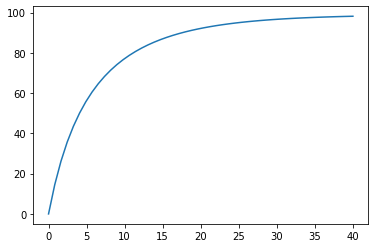

In [8]:
# Simulate the model
time = linspace(0, 40)
x = odesolve(model, time)

plot(time, x['LR'])